# Simulations of the semi-discrete prey-predator models

In [30]:
#Import module
from models import *

In [74]:
#Set the parameters that will be used all along the code
r = 0.5
r_great = 5 #To not satisfy stability conditions for BDA model
K = 10 
a = 20
c = 20
m = 0.1
gamma = 0.8
b = 5
q = 0.1

mu = 1
mu_small = 0.01 #To not satisfy stability conditions (for any model)
mu_las = 0.06 #To satisfy only LAS conditions for BDA model
T = 5
T_small = 0.2

t_0 = 0
t_n = 50

## 1. Model without interaction

### 1.1 Simulations when GAS conditions are satisfied

Check if the condition of GAS is filled for the default values

$c > K$

In [75]:
print(f'{mu =}')
print(f'{r*m*c/a =}')
mu > r*m*c/a

mu =1
r*m*c/a =0.05


True

The condition is satisfied.

#### Solve ODE

Solve ODE for the periodical solution

In [76]:
#Initial conditions
y_p_0 = mu*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_no_int_ode(xy_p_0, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial values

In [77]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_no_int_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_a = xy_a[0]
y_a = xy_a[1]



#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_no_int_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_no_int_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_i = xy_i[0]
y_i = xy_i[1]

#### Plot the results

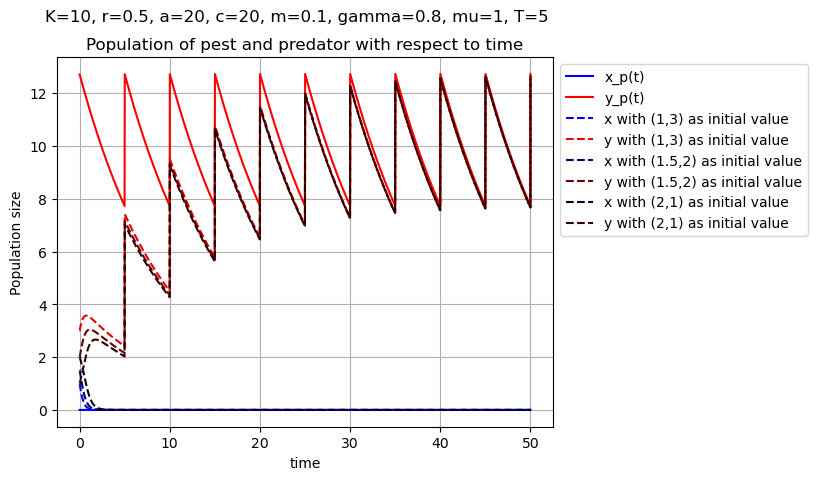

In [78]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.1, gamma=0.8, mu=1, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 1.2 Simulations when GAS neither LAS conditions are not satisfied

#### Solve ODE

In [79]:
print(f'{mu_small =}')
print(f'{r*m*c/a =}')
mu_small > r*m*c/a

mu_small =0.01
r*m*c/a =0.05


False

The condition is not satisfied

Solve ODE for the periodical solution

In [80]:
#Initial conditions
y_p_0 = mu_small*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_no_int_ode(xy_p_0, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu_small, T=T, t_0=t_0, t_n=t_n)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial values

In [81]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_no_int_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu_small, T=T, t_0=t_0, t_n=t_n)

x_a = xy_a[0]
y_a = xy_a[1]



#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_no_int_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu_small, T=T, t_0=t_0, t_n=t_n)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_no_int_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu_small, T=T, t_0=t_0, t_n=t_n)

x_i = xy_i[0]
y_i = xy_i[1]

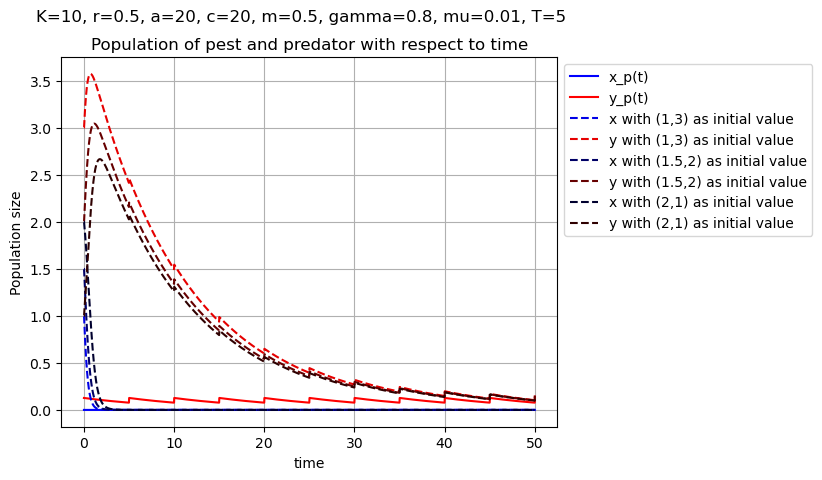

In [82]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, mu=0.01, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

## 2. Beddington-DeAngelis model

### 2.1 Simulations when GAS conditions are satisfied

First condition:  


In [83]:
print(f'{r = }')
print(f'{a/b = }')
r < a/b

r = 0.5
a/b = 4.0


True

Second condition  

In [84]:
mu_b = calculate_mu_b(r=r, K=K, a=a, c=c, m=m, b=b, T=T)
print(f'{mu = }')
print(f'{mu_b = }')
mu > mu_b

mu = 1
mu_b = 0.0859370227422639


True

The two conditions are satisfied

#### Solve ODE

Solve ODE for the periodical solution

In [85]:
#Initial conditions
y_p_0 = mu*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_bda_ode(xy_p_0, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial values

In [86]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_bda_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_a = xy_a[0]
y_a = xy_a[1]



#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_bda_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_bda_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_i = xy_i[0]
y_i = xy_i[1]

#### Plot the results

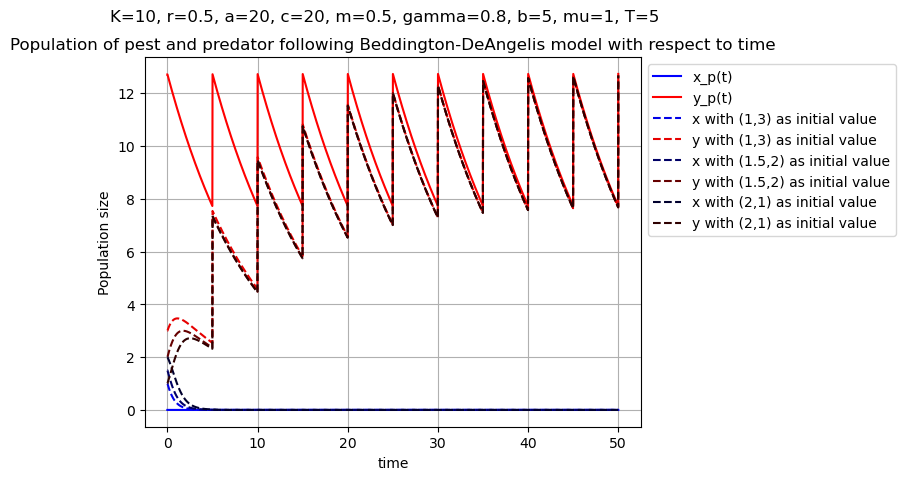

In [87]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator following Beddington-DeAngelis model with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, b=5, mu=1, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 2.2 Simulations when LAS conditions are satisfied but not GAS

In [88]:
mu_b_gas = calculate_mu_b(r=r, K=K, a=a, c=c, m=m, b=b, T=T)
mu_b_las = calculate_mu_b(r=r, K=0, a=a, c=c, m=m, b=b, T=T)
print(f'{mu_b_gas = }')
print(f'{mu_b_las = }')

mu_b_gas = 0.0859370227422639
mu_b_las = 0.057291348494842596


#### Solve ODE

Solve ODE for the periodical solution

In [89]:
y_p_0 = mu_las*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_bda_ode(xy_p_0, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu_las, T=T, t_0=t_0, t_n=t_n)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial values

In [90]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_bda_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu_las, T=T, t_0=t_0, t_n=t_n)

x_a = xy_a[0]
y_a = xy_a[1]



#[2,6]
#Initial condition
x0_f = 2
y0_f = 6
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_bda_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu_las, T=T, t_0=t_0, t_n=t_n)

x_f = xy_f[0]
y_f = xy_f[1]



#[4,12]
#Initial condition
x0_i = 4
y0_i = 12
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_bda_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu_las, T=T, t_0=t_0, t_n=t_n)

x_i = xy_i[0]
y_i = xy_i[1]

#### Plot the results

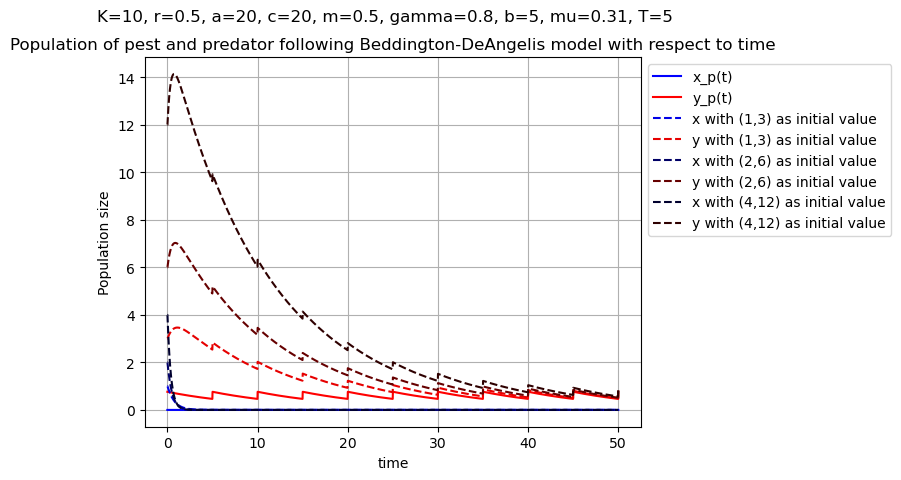

In [91]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (2,6) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (2,6) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (4,12) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (4,12) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator following Beddington-DeAngelis model with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, b=5, mu=0.31, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

For any initial values tested, solutions still converge to the periodic solution

### 2.3 Simulations when LAS conditions are not satisfied

#### Solve ODE

Solve ODE for the periodic solution

In [92]:
#Initial conditions
y_p_0 = mu_small*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_bda_ode(xy_p_0, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu_small, T=T, t_0=t_0, t_n=t_n)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial conditions

In [93]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_bda_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu_small, T=T, t_0=t_0, t_n=t_n)

x_a = xy_a[0]
y_a = xy_a[1]



#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_bda_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu_small, T=T, t_0=t_0, t_n=t_n)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_bda_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu_small, T=T, t_0=t_0, t_n=t_n)

x_i = xy_i[0]
y_i = xy_i[1]

#### Plot the results

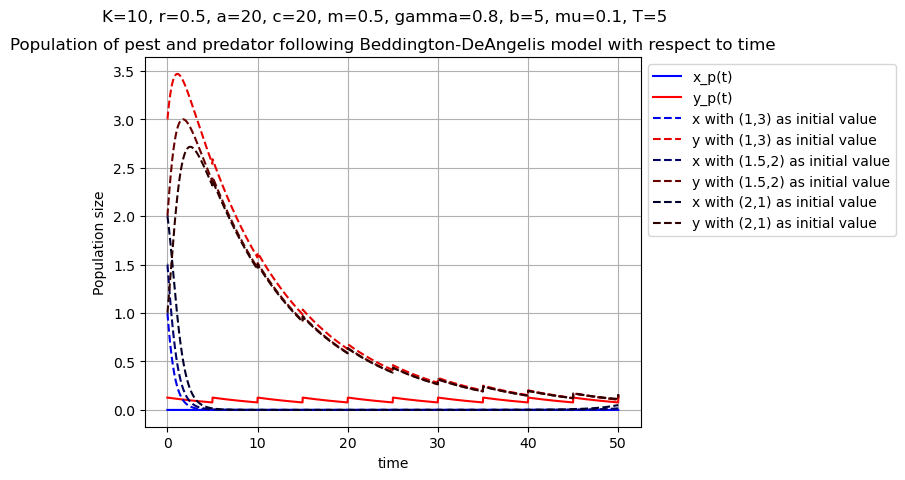

In [94]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator following Beddington-DeAngelis model with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, b=5, mu=0.1, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 2.4 Simulations when $r > \frac{a}{b}$ even for a high $\mu$

In [95]:
print(f'{a/b = }')

a/b = 4.0


#### Solve ODE

Solve ODE for the periodic solution

In [96]:
#Initial conditions
y_p_0 = mu*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_bda_ode(xy_p_0, r=r_great, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial values

In [97]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_bda_ode(x0y0_a, r=r_great, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_a = xy_a[0]
y_a = xy_a[1]



#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_bda_ode(x0y0_f, r=r_great, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_bda_ode(x0y0_i, r=r_great, K=K, a=a, c=c, m=m, gamma=gamma, b=b, mu=mu, T=T, t_0=t_0, t_n=t_n)

x_i = xy_i[0]
y_i = xy_i[1]

#### Plot the results

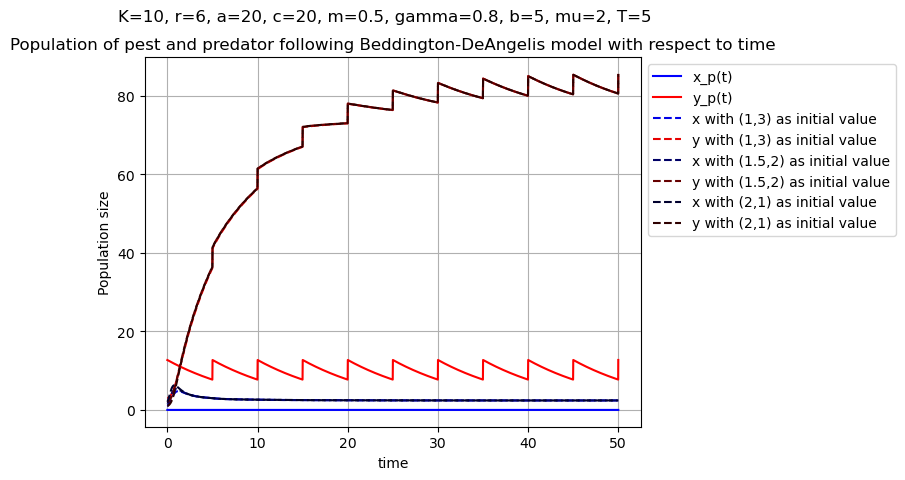

In [98]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator following Beddington-DeAngelis model with respect to time')
plt.suptitle('K=10, r=6, a=20, c=20, m=0.5, gamma=0.8, b=5, mu=2, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

It seems to converge to another periodic solution but which is not a pest-free solution.

## 3.Squabbling model

The periodic solution of this model is complicated to implement. What we are sure is that x=0.

Change T to be small enough

### 3.1 Simulations when GAS conditions are satisfied

Check if GAS conditions are satisfied.

In [99]:
mu_q = calculate_mu_q(r=r, K=K, a=a, c=c, m=m, q=q)
print(f'{mu_q = }')
print(f'{mu = }')
mu > mu_q

mu_q = 0.07500000000000001
mu = 1


True

The conditions of GAS are satisfied

#### Solve ODE

Change the initial conditions (this time, we can't begin with solving the periodic solution because we don't have the initial value for the periodic solution.) The t will have the size of the solution for one initial value.

In [100]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_s_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, q=q, gamma=gamma, mu=mu, T=T_small, t_0=t_0, t_n=t_n)

x_a = xy_a[0]
y_a = xy_a[1]

t = xy_a[2]

#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_s_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T_small, t_0=t_0, t_n=t_n)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_s_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T_small, t_0=t_0, t_n=t_n)

x_i = xy_i[0]
y_i = xy_i[1]

Periodic solution

In [101]:
x_p = np.zeros_like(t)
y_p = y_p_s(t=t, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T_small)

#### Plot results

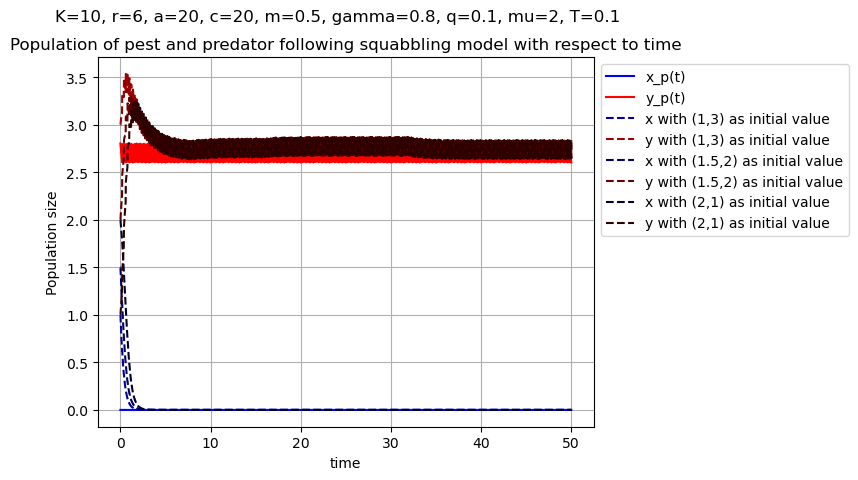

In [102]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.6), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.6,0,0), linestyle='--', label='y with (1,3) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator following squabbling model with respect to time')
plt.suptitle('K=10, r=6, a=20, c=20, m=0.5, gamma=0.8, q=0.1, mu=2, T=0.2')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 3.2 Simulations when GAS conditions are not satisfied

Check if GAS conditions are satisfied.

In [103]:
mu_q = calculate_mu_q(r=r, K=K, a=a, c=c, m=m, q=q)
print(f'{mu_q = }')
print(f'{mu_small = }')
mu_small > mu_q

mu_q = 0.07500000000000001
mu_small = 0.01


False

The GAS consitions are not satisfied.

#### Solve ODE

Change the initial conditions

In [104]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_s_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, q=q, gamma=gamma, mu=mu_small, T=T_small, t_0=t_0, t_n=t_n)

x_a = xy_a[0]
y_a = xy_a[1]

t = xy_a[2]

#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_s_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu_small, T=T_small, t_0=t_0, t_n=t_n)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_s_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu_small, T=T_small, t_0=t_0, t_n=t_n)

x_i = xy_i[0]
y_i = xy_i[1]

Periodic solution

In [105]:
x_p = np.zeros_like(t)
y_p = y_p_s(t=t, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu_small, T=T_small)

#### Plot results

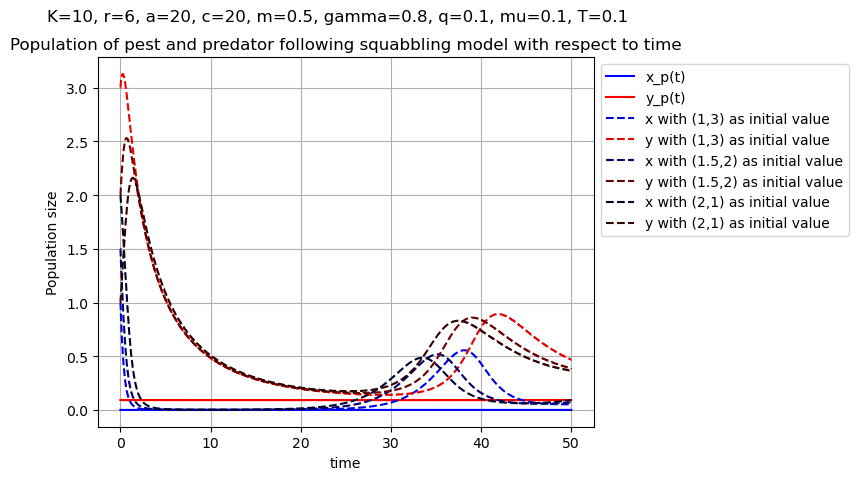

In [106]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator following squabbling model with respect to time')
plt.suptitle('K=10, r=6, a=20, c=20, m=0.5, gamma=0.8, q=0.1, mu=0.1, T=0.2')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

The solutions don't converge to the periodic solution as expected but y_p seems to be constant.